<a href="https://colab.research.google.com/github/s4bih/machine-learning/blob/main/prediksi_hujan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection

In [3]:
import pandas as pd
file_id = '1ha6-YJq02MBaSPgTSPg3kTqXNI0TYzqi'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


# Data processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [6]:
data.isnull().sum()

,0
DATE,0
PRCP,3
TMAX,0
TMIN,0
RAIN,3


In [7]:
data.duplicated().sum()

0

# data cleaning

In [8]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

,0
DATE,0
PRCP,0
TMAX,0
TMIN,0
RAIN,0


# Data formating

In [12]:
#cahnging columns to neccesary data type
data = data.astype({'DATE':'datetime64[ns]','RAIN': 'int16'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25548 non-null  datetime64[ns]
 1   PRCP    25548 non-null  float64       
 2   TMAX    25548 non-null  int64         
 3   TMIN    25548 non-null  int64         
 4   RAIN    25548 non-null  int16         
dtypes: datetime64[ns](1), float64(1), int16(1), int64(2)
memory usage: 1.0 MB


# Exploratory Data Analysis(EDA)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Monthly rain

In [14]:
data['MONTH'] = data['DATE'].dt.month
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN,MONTH
0,1948-01-01,0.47,51,42,1,1
1,1948-01-02,0.59,45,36,1,1
2,1948-01-03,0.42,45,35,1,1
3,1948-01-04,0.31,45,34,1,1
4,1948-01-05,0.17,45,32,1,1


In [36]:
#create a pivot table
monthly_rain = data.pivot_table( index=['RAIN'], columns=['MONTH'], aggfunc='size',fill_value = 0)
monthly_rain

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
RAIN,,,,,,,,,,,,
0,872,875,958,1102,1399,1466,1827,1757,1490,1220,836,846
1,1298,1103,1212,998,771,632,343,413,609,950,1264,1307


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25548 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25548 non-null  datetime64[ns]
 1   PRCP    25548 non-null  float64       
 2   TMAX    25548 non-null  int64         
 3   TMIN    25548 non-null  int64         
 4   RAIN    25548 non-null  int16         
 5   MONTH   25548 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int16(1), int32(1), int64(2)
memory usage: 1.1 MB


In [39]:
#select the row where rain is 1
monthly_rain = monthly_rain.loc[1]
monthly_rain

,1
MONTH,
1,1298
2,1103
3,1212
4,998
5,771
6,632
7,343
8,413
9,609


In [29]:
#extract the keys(month) and value(count)
months = monthly_rain.keys()
counts = monthly_rain.values

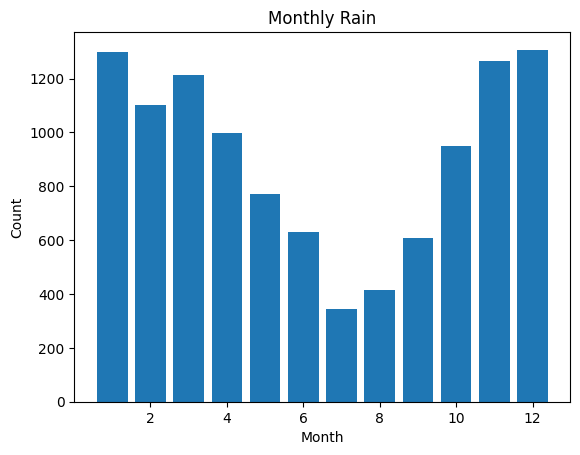

In [30]:
#create a bar plot
plt.bar(months,counts)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Rain')
plt.show()

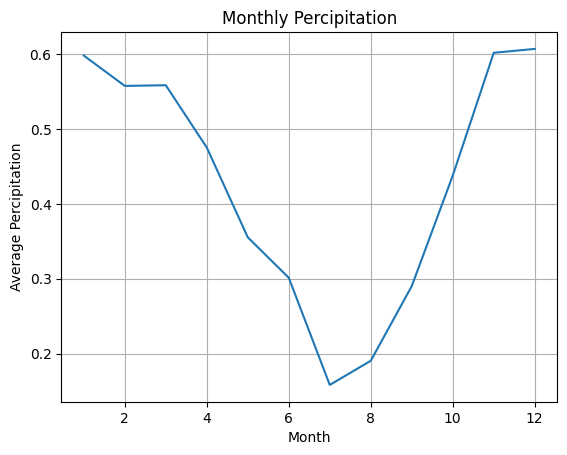

In [43]:
#monthly percipitation
#calculate the average percipitation
average_percipitation = data.groupby('MONTH')['RAIN'].mean()


#create a line plot
plt.plot(average_percipitation.index, average_percipitation.values)
plt.xlabel('Month')
plt.ylabel('Average Percipitation')
plt.title('Monthly Percipitation')
plt.grid(True)
plt.show()

In [44]:
#calculate the average max and min temperature by mounth
average_max_temp = data.groupby('MONTH')['TMAX'].mean()
average_min_temp = data.groupby('MONTH')['TMIN'].mean()

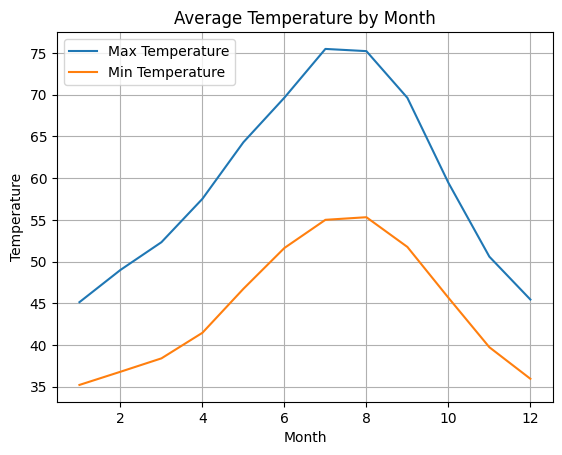

In [46]:
#create a line plot
plt.plot(average_max_temp.index, average_max_temp.values, label='Max Temperature')
plt.plot(average_min_temp.index, average_min_temp.values, label='Min Temperature')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Average Temperature by Month')
plt.grid(True)
plt.show()

